In [346]:
import pandas as pd 
import csv
import numpy as np
from zipfile import ZipFile
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima_model import ARIMA

# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [335]:
# 1. Get the autocorrelation and partial autocorrelation for the names Olivia, Newton and John.
# importing required modules
# from zipfile import ZipFile
  
# specifying the zip file name
# file_name = "data/babies.zip"
  
# # opening the zip file in READ mode
# with ZipFile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')


In [340]:
pwd

'/Users/mayarossi/DS-Workshop/5-5-time-series/data'

In [341]:
import csv
from zipfile import ZipFile

# This list will hold all our data. We initialize it with the header row.
data_list = [["year", "name", "gender", "count"]]

# We first read the zip file using a zipfile.ZipFile object.
with ZipFile("/Users/mayarossi/DS-Workshop/5-5-time-series/data/babies.zip") as temp_zip:

    # Then we read the file list.
    for file_name in temp_zip.namelist():

        # We will only process .txt files.
        if ".txt" in file_name:

            # Now we read the current file from the zip file.
            with temp_zip.open(file_name) as temp_file:

                # The file is opened as binary, we decode it using utf-8 so it can be manipulated as a string.
                for line in temp_file.read().decode("utf-8").splitlines():

                    # We prepare our desired data fields and add them to the data list.
                    line_chunks = line.split(",")
                    year = file_name[3:7]
                    name = line_chunks[0]
                    gender = line_chunks[1]
                    count = line_chunks[2]

                    data_list.append([year, name, gender, count])

# We save the data list into a csv file.
csv.writer(open("data.csv", "w", newline="",
                encoding="utf-8")).writerows(data_list)

In [342]:
df = pd.read_csv("data.csv")

In [343]:
df_sort = df.sort_values(by='year')
df_sort = df_sort.set_index('year')

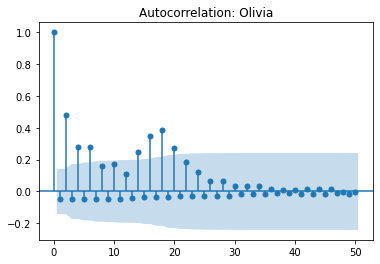

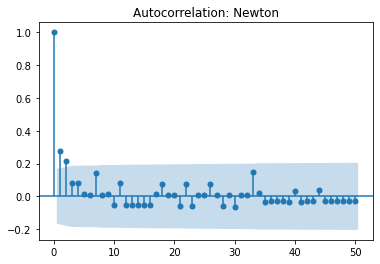

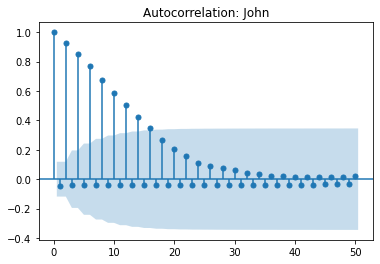

In [344]:
names = ['Olivia', 'Newton', 'John']

for name in names:
    plot_acf((df['count'] - df['count'].shift())[1:].loc[df['name'] == name], 
             lags=50, 
             title= f'Autocorrelation: {name}'
             )

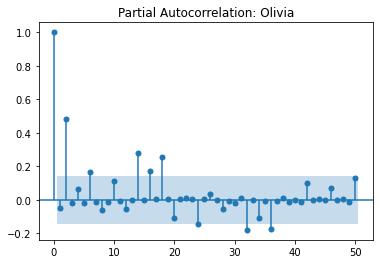

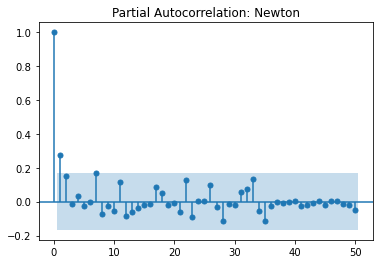

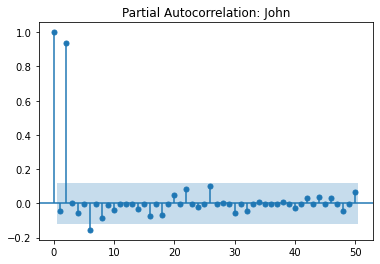

In [345]:
for name in names:
    plot_pacf((df['count'] - df['count'].shift())[1:].loc[df['name'] == name],
              lags=50, 
              title = f'Partial Autocorrelation: {name}')

In [77]:
# Case 1: No subtraction
no_sub_ts = ts_smooth
no_sub_ts.dropna(inplace = True)

# Case 2: Yes subtraction
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)

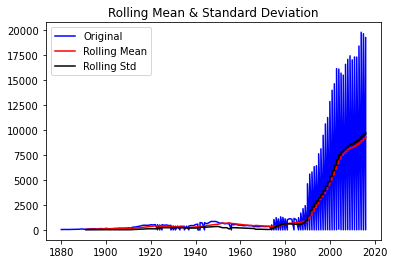

Results of Dickey-Fuller Test:


Test Statistic                   0.444122
p-value                          0.983072
#Lags Used                      11.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64

In [81]:
# Just to take a look:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(df_olivia['count'])

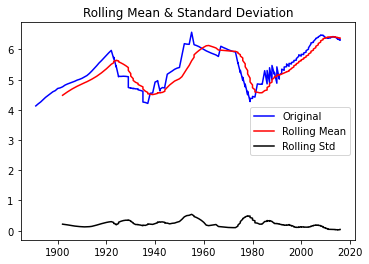

Results of Dickey-Fuller Test:


Test Statistic                  -1.711272
p-value                          0.425314
#Lags Used                      12.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64

In [84]:
# Perform Dickey-Fuller on both
test_stationarity(no_sub_ts)
# test_stationarity(sub_ts)

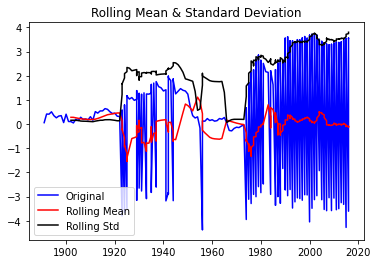

Results of Dickey-Fuller Test:


Test Statistic                -5.983317e+00
p-value                        1.816723e-07
#Lags Used                     6.000000e+00
Number of Observations Used    2.780000e+02
Critical Value (1%)           -3.454094e+00
Critical Value (5%)           -2.871993e+00
Critical Value (10%)          -2.572340e+00
dtype: float64

In [83]:
# Perform Dickey-Fuller on both
test_stationarity(sub_ts)

In [ ]:
# 1.2 Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [348]:
df_sort.loc[2016].sort_values('count').tail(5)

,name,gender,count
year,,,
2016,Ava,F,16237
2016,Liam,M,18138
2016,Noah,M,19015
2016,Olivia,F,19246
2016,Emma,F,19414


In [354]:
# The p-value is greater than the significance level 0.05 so it is not stationary and differencing is as such needed, ie. d > 0.

from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(df_emma['count'].dropna())[1])

p-value: 0.09852657471003545


/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/mayarossi/opt

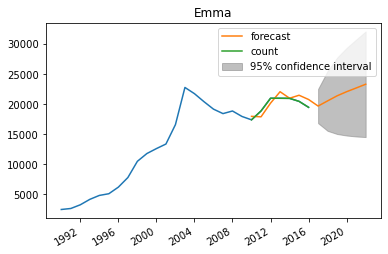

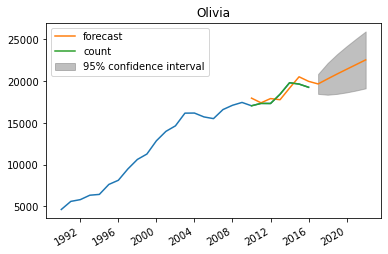

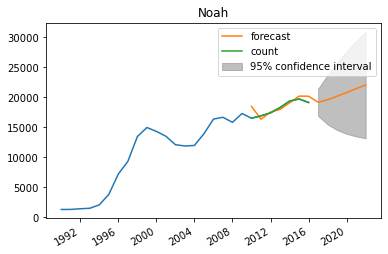

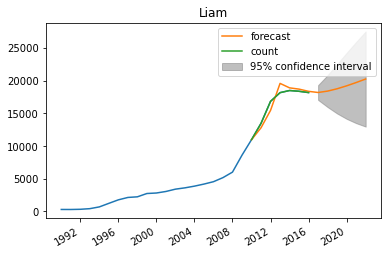

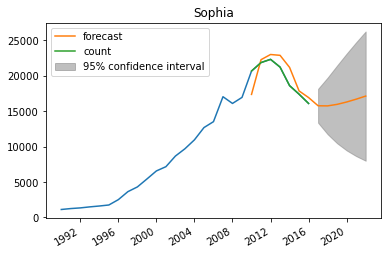

In [349]:

df.year = df.year.astype(int) #Convert to in
n_df = df[df.year >= 1990] #Start at 90's gives us at least 25 years of data
trend_df = df[df.year >= 2014] #Check names from past 5 years. 90s too much range

names = list(trend_df.groupby('name')['count']
                     .sum()
                     .sort_values(ascending=False)
                     .head(5)
                     .reset_index()
                     .name
                     .unique()
                     ) #Top ten names for 2014-2016

for name in names:
    temp_df = n_df.copy()
    temp_df = temp_df[temp_df.name==name] #Temp df based on name
    temp_df.year = pd.to_datetime(temp_df.year,format='%Y') #Set datetime object
    temp_df = pd.DataFrame(temp_df.groupby('year')['count'].sum()) #Group by year - regardless of gender
    model = ARIMA(temp_df, order=(2, 1, 0))
    res = model.fit(disp=-1)
    fig, ax = plt.subplots()
    ax.plot(temp_df['count'])
    res.plot_predict('2010', '2022', ax=ax)
    plt.title(label=name);

# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [253]:
gdp = pd.read_csv('/Users/mayarossi/DS-Workshop/5-5-time-series/data/GDP.csv')
# pd.read_csv?
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp = gdp.set_index('DATE')
gdp

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19520.114


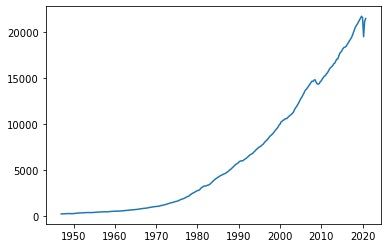

In [263]:
plt.plot(gdp)

In [254]:
unrate = pd.read_csv('/Users/mayarossi/DS-Workshop/5-5-time-series/data/UNRATE.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate = unrate.set_index('DATE')
unrate

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2020-11-01,6.7
2020-12-01,6.7
2021-01-01,6.3


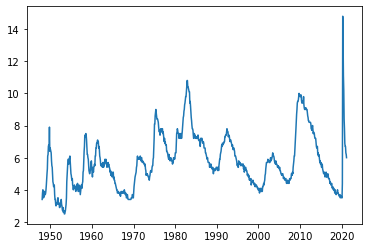

In [257]:
plt.plot(unrate)

In [ ]:
# 1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

In [266]:
# pip install pmdarima

In [358]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(gdp, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3882.976, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3883.715, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3881.071, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3881.009, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3928.577, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3882.905, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3852.305, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3851.056, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3849.947, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3877.629, Time=0.33 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 3.079 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  296
M

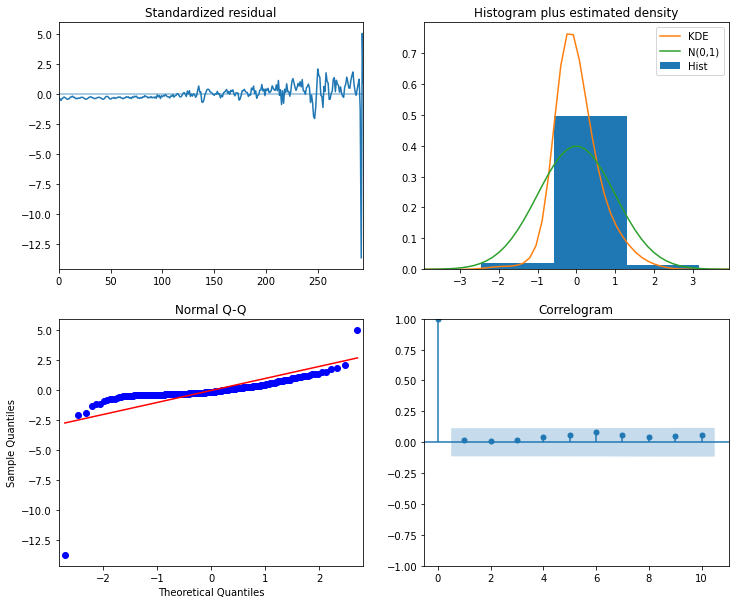

In [360]:
model.plot_diagnostics(figsize=(12,10))
plt.show()

In [ ]:
# residual error seems to increase with time...
# density plot is not quite a normal distribution
# dots fall fairly nicely in line with line (any significant deviations imply the distribution is skewed)
# ACF plot shows residual errors are not correlated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X's [predictors] to the model. 

In [287]:
model_unrate = pm.auto_arima(unrate, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_unrate.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1000.063, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5650.575, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4486.612, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=998.098, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1000.091, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1000.091, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1000.691, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1001.366, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=984.511, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=985.702, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=985.851, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=986.372, T

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



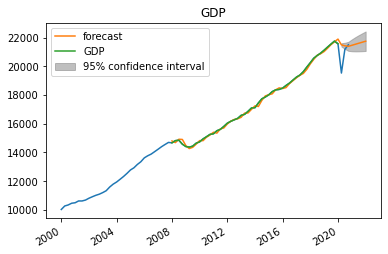

In [286]:
model = ARIMA(gdp[:'2020-01-01'], order=(0,1,3)) #using 2020-04-01 is too much after the 'shock'
res = model.fit(disp=-1)
fig, ax = plt.subplots()
ax.plot(gdp['2000':])
res.plot_predict('2008', '2022', ax=ax)
plt.title(label='GDP');

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



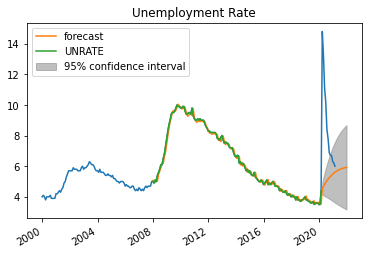

In [292]:
model_unrate = ARIMA(unrate[:'2020-03-01'], order=(2,0,1)) #using 2020-04-01 is too much after the 'shock'
res = model_unrate.fit(disp=-1)
fig, ax = plt.subplots()
ax.plot(unrate['2000':])
res.plot_predict('2008', '2022', ax=ax)
plt.title(label='Unemployment Rate');

In [ ]:
# Covid has definitely had an impact on unemployment rate -  gdp seems to be reverting to the mean. 

In [ ]:
##### 

In [ ]:
# 2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [297]:
# Let’s use the Augmented Dickey Fuller (ADF) test to see if the timeseries is stationary:

print("p-value:", adfuller(gdp.dropna())[1])
# so we fail to reject the null hypothesis: therefore there is a unit root and it is non-stationary (no bueno)

p-value: 1.0


In [ ]:
# The p-value is greater than the significance level 0.05 so it is not stationary and differencing is as such needed, ie. d > 0.

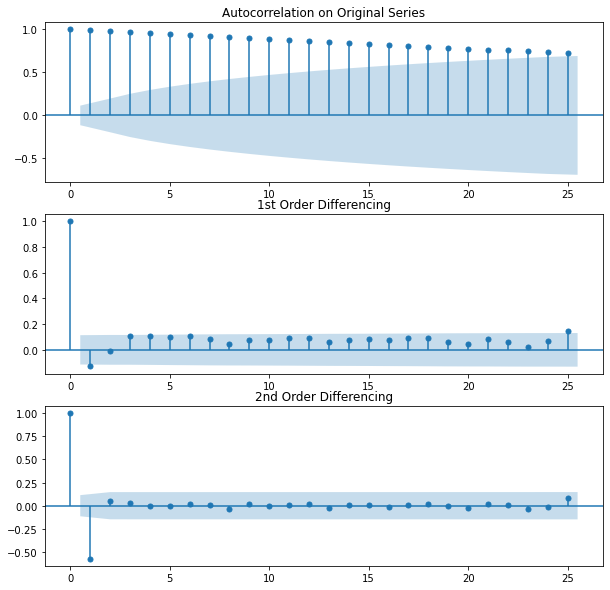

In [301]:
# We start by finding out the order of differencing, d, using auto correlation:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(gdp, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(gdp.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(gdp.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")

In [ ]:
#The timeseries is stationary at d = 1 where only the first lag is above the significance level. If your series is slightly under differenced, try adding an additional AR term and if it is slightly over-differenced, maybe add an additional MA term.
#Knowing we should difference once, we go on to find out the order of AR, p. We get it by counting the number of lags above the level of significance in partial autocorrelation:

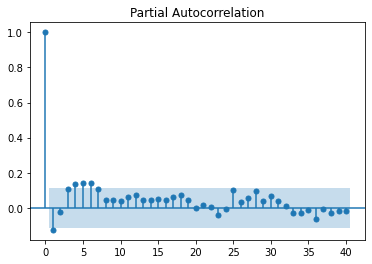

In [303]:
plot_pacf(gdp.diff().dropna(), lags=40);

In [ ]:
# The first lag is the only one vastly above the signicance level and so p = 1.
# The autocorrelation function can tell the order of MA terms, q, needed to remove autocorrelation in the stationary series.

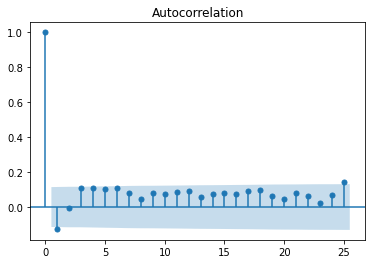

In [306]:
plot_acf(gdp.diff().dropna());

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



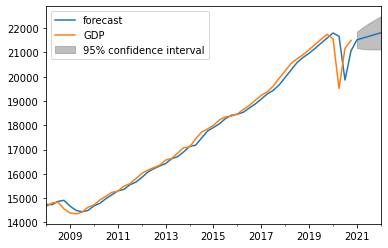

In [311]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp, order=(1, 1, 1))
results = model.fit()
results.plot_predict('2008', '2022');

In [ ]:
###

In [370]:
def test_stationarity(timeseries, window=12):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    return dfoutput

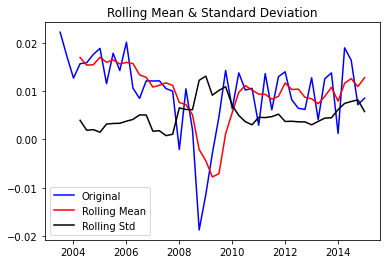

Results of Dickey-Fuller Test:


Test Statistic                 -3.971460
p-value                         0.001568
#Lags Used                      0.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64

In [371]:
# Let's look at 2008
df = gdp.iloc[gdp.index > '2003']
df = df.iloc[df.index <= '2015']
df.index = pd.to_datetime(df.index)
df = np.log(df)
df = df - df.shift()
df.dropna(inplace = True)

test_stationarity(df, window=4)

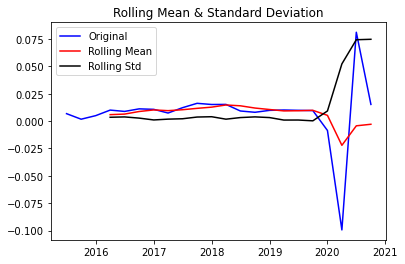

Results of Dickey-Fuller Test:


Test Statistic                 -1.851612
p-value                         0.355155
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

In [372]:
# Let's look at 2020
df = gdp.iloc[gdp.index > '2015']
df.index = pd.to_datetime(df.index)
df = np.log(df)
df = df - df.shift()
df.dropna(inplace = True)

test_stationarity(df, window=4)

In [ ]:
# According to the data, the 2008 shock is stationary. 
# Difficult to talk about the 2020 shock as we are probably not post-shock yet. But data indicates a unit root process. 